In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

In [2]:
comtrade_07_09 = pd.read_csv('comtrade_07_09.csv')
comtrade_10_14 = pd.read_csv('comtrade_10_14.csv')
comtrade_15_19 = pd.read_csv('comtrade_15_19.csv')

In [3]:
frames = [comtrade_15_19, comtrade_07_09 ,comtrade_10_14]
comtrade = pd.concat(frames)

In [4]:
comtrade.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H5,2017,2017,2017,2,0,1,Import,8,Albania,...,0.00,NaN,NaN,NaN,0.00,NaN,208617396,NaN,NaN,0
1,H5,2017,2017,2017,2,0,1,Import,12,Algeria,...,0.00,NaN,NaN,NaN,0.00,NaN,1892866531,NaN,NaN,4
2,H5,2017,2017,2017,2,0,1,Import,20,Andorra,...,0.00,NaN,NaN,NaN,0.00,NaN,33846021,NaN,NaN,0
3,H5,2017,2017,2017,2,0,1,Import,36,Australia,...,0.00,NaN,NaN,NaN,NaN,NaN,8037943271,NaN,NaN,4
4,H5,2017,2017,2017,2,0,1,Import,40,Austria,...,0.00,NaN,NaN,NaN,0.00,NaN,6018320835,NaN,NaN,4


In [5]:
comtrade.drop(['Period',
               'Trade Flow Code',
               'Classification',
               'Alt Qty Unit Code',
               'Alt Qty Unit',
               'Alt Qty',
               'Netweight (kg)',
               'Gross weight (kg)',
               'Qty',
               'Is Leaf Code',
               'Aggregate Level',
               'Period Desc.',
               'CIF Trade Value (US$)',
               'FOB Trade Value (US$)',
               'Flag',
               '2nd Partner ISO',
               'Customs Proc. Code',
               'Customs',
               'Mode of Transport Code',
               'Mode of Transport',
               'Qty Unit Code',
               'Qty Unit',
               '2nd Partner Code',
               '2nd Partner']
              ,axis=1,inplace = True)
comtrade.head()

,Year,Trade Flow,Reporter Code,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Trade Value (US$)
0,2017,Import,8,Albania,ALB,0,World,WLD,30,Pharmaceutical products,208617396
1,2017,Import,12,Algeria,DZA,0,World,WLD,30,Pharmaceutical products,1892866531
2,2017,Import,20,Andorra,AND,0,World,WLD,30,Pharmaceutical products,33846021
3,2017,Import,36,Australia,AUS,0,World,WLD,30,Pharmaceutical products,8037943271
4,2017,Import,40,Austria,AUT,0,World,WLD,30,Pharmaceutical products,6018320835


In [6]:
comtrade['Year'].unique()

array([2017, 2018, 2019, 2015, 2016, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

In [7]:
comtrade.rename({'Year': 'year', 'Reporter ISO': 'iso3_d','Reporter Code':'iso3num_d_y'}, axis='columns', inplace = True)

In [8]:
merged_codes = pd.read_csv('final_merged_right_codes_grouped_trade_flow.csv')

In [9]:
merged_codes.drop(['iso3num_o_x', 'iso3num_d_x'], axis=1,inplace = True)

In [10]:
merged_codes.head()

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,wto_o,wto_d,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows
0,2007,AFG,CAN,0.00,10768.89,0.00,0.01,9843851.26,1457872830.46,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,6.00,4,124,0.25
1,2007,AFG,CRI,0.00,14334.57,0.00,0.00,9843851.26,26321999.87,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,6.00,4,188,30.06
2,2007,AFG,DOM,0.00,12709.28,0.00,0.00,9843851.26,44078280.70,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,6.00,4,214,0.00
3,2007,AFG,KOR,0.00,5131.89,0.00,0.00,9843851.26,1122675851.26,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,6.00,4,410,0.01
4,2007,AFG,NLD,0.00,5361.40,0.00,0.01,9843851.26,833147764.74,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,6.00,4,528,9.61


In [12]:
result = pd.merge(merged_codes, comtrade[['iso3_d', 'year','Trade Value (US$)']], how="left", on=["iso3_d", "year"])

In [13]:
comtrade[(comtrade['year'] == 2007) & (comtrade['iso3num_d_y'] == 12)]

,year,Trade Flow,iso3num_d_y,Reporter,iso3_d,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Trade Value (US$)
0,2007,Import,12,Algeria,DZA,0,World,WLD,30,Pharmaceutical products,1447618695


In [14]:
merged_codes[(merged_codes['year'] == 2007) & (merged_codes['iso3num_d_y'] == 12)]

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,wto_o,wto_d,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows
88,2007,ARG,DZA,0.00,10188.35,0.00,0.01,329761488.90,134977871.87,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,6.00,32,12,1141.96
191,2007,AUS,DZA,0.00,17139.16,0.00,0.00,853441183.74,134977871.87,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,6.00,36,12,1087.73
339,2007,AUT,DZA,0.00,1670.58,0.00,0.01,386439118.85,134977871.87,1.00,...,1.00,0.00,1.00,0.00,1.00,1.00,4.00,40,12,17701.30
503,2007,BGD,DZA,0.00,8242.79,0.00,0.85,79611887.62,134977871.87,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,6.00,50,12,0.17
590,2007,BEL,DZA,0.00,1561.88,1.00,0.01,472284561.41,134977871.87,1.00,...,1.00,0.00,1.00,0.00,1.00,1.00,4.00,56,12,30775.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7568,2007,TUN,DZA,1.00,642.72,1.00,0.98,38920216.58,134977871.87,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,6.00,788,12,5371.51
7588,2007,TUR,DZA,0.00,2285.82,0.00,0.98,647155154.94,134977871.87,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,6.00,792,12,15354.34
7793,2007,EGY,DZA,0.00,2718.83,1.00,0.81,130477817.86,134977871.87,1.00,...,1.00,0.00,0.00,0.00,0.00,0.00,6.00,818,12,5173.24
7854,2007,GBR,DZA,0.00,1651.44,0.00,0.01,2963265290.24,134977871.87,1.00,...,1.00,0.00,1.00,0.00,1.00,1.00,4.00,826,12,67916.65


In [15]:
result[(result['year'] == 2007) & (result['iso3num_d_y'] == 12)]

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,wto_d,eu_o,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows,Trade Value (US$)
88,2007,ARG,DZA,0.00,10188.35,0.00,0.01,329761488.90,134977871.87,1.00,...,0.00,0.00,0.00,0.00,0.00,6.00,32,12,1141.96,1447618695.00
191,2007,AUS,DZA,0.00,17139.16,0.00,0.00,853441183.74,134977871.87,1.00,...,0.00,0.00,0.00,0.00,0.00,6.00,36,12,1087.73,1447618695.00
339,2007,AUT,DZA,0.00,1670.58,0.00,0.01,386439118.85,134977871.87,1.00,...,0.00,1.00,0.00,1.00,1.00,4.00,40,12,17701.30,1447618695.00
503,2007,BGD,DZA,0.00,8242.79,0.00,0.85,79611887.62,134977871.87,1.00,...,0.00,0.00,0.00,0.00,0.00,6.00,50,12,0.17,1447618695.00
590,2007,BEL,DZA,0.00,1561.88,1.00,0.01,472284561.41,134977871.87,1.00,...,0.00,1.00,0.00,1.00,1.00,4.00,56,12,30775.37,1447618695.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7568,2007,TUN,DZA,1.00,642.72,1.00,0.98,38920216.58,134977871.87,1.00,...,0.00,0.00,0.00,0.00,0.00,6.00,788,12,5371.51,1447618695.00
7588,2007,TUR,DZA,0.00,2285.82,0.00,0.98,647155154.94,134977871.87,1.00,...,0.00,0.00,0.00,0.00,0.00,6.00,792,12,15354.34,1447618695.00
7793,2007,EGY,DZA,0.00,2718.83,1.00,0.81,130477817.86,134977871.87,1.00,...,0.00,0.00,0.00,0.00,0.00,6.00,818,12,5173.24,1447618695.00
7854,2007,GBR,DZA,0.00,1651.44,0.00,0.01,2963265290.24,134977871.87,1.00,...,0.00,1.00,0.00,1.00,1.00,4.00,826,12,67916.65,1447618695.00


In [16]:
result['Market_Share'] = result['trade_flows']/result['Trade Value (US$)']

In [ ]:
result.head()

# Add HHI to the dataset

In [17]:
hhi = pd.read_csv('data.csv')

/home/max/Python/Angela/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
hhi.columns

Index(['Country ISO3', 'Country Name', 'Indicator Id', 'Indicator',
       'Subindicator Type', 'Product', 'Partner', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [19]:
hhi.drop(['1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
          'Subindicator Type',
          'Product',
          'Partner'], 
         axis = 1, inplace= True )

In [20]:
hhi = hhi.drop(hhi[hhi['Indicator Id'] != 2370].index)

In [21]:
hhi.head()

,Country ISO3,Country Name,Indicator Id,Indicator,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
22,ABW,Aruba,2370,HH Market Concentration Index,0.44,0.36,0.36,0.11,0.53,0.22,0.11,0.16,0.13,NaN
1263,AFG,Afghanistan,2370,HH Market Concentration Index,NaN,0.14,0.45,0.15,0.19,0.24,0.23,0.28,0.37,NaN
2580,AGO,Angola,2370,HH Market Concentration Index,0.19,NaN,0.20,0.24,0.20,0.23,0.22,0.25,0.24,NaN
5075,ALB,Albania,2370,HH Market Concentration Index,0.34,0.26,0.51,0.25,0.24,0.24,0.22,0.23,0.23,NaN
8492,AND,Andorra,2370,HH Market Concentration Index,0.22,0.25,0.26,0.48,0.59,0.32,0.48,0.57,NaN,NaN


In [22]:
new_hhi = hhi.melt(id_vars = ['Country ISO3','Country Name','Indicator Id','Indicator'],
                   var_name = 'year',
                   value_name ='HHI_value')

In [23]:
new_hhi.head()

,Country ISO3,Country Name,Indicator Id,Indicator,year,HHI_value
0,ABW,Aruba,2370,HH Market Concentration Index,2007,0.44
1,AFG,Afghanistan,2370,HH Market Concentration Index,2007,NaN
2,AGO,Angola,2370,HH Market Concentration Index,2007,0.19
3,ALB,Albania,2370,HH Market Concentration Index,2007,0.34
4,AND,Andorra,2370,HH Market Concentration Index,2007,0.22


In [24]:
new_hhi.rename({'Country ISO3': 'iso3_o'}, axis='columns', inplace = True)
new_hhi.head(3)

,iso3_o,Country Name,Indicator Id,Indicator,year,HHI_value
0,ABW,Aruba,2370,HH Market Concentration Index,2007,0.44
1,AFG,Afghanistan,2370,HH Market Concentration Index,2007,NaN
2,AGO,Angola,2370,HH Market Concentration Index,2007,0.19


In [25]:
new_hhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso3_o        1880 non-null   object 
 1   Country Name  1880 non-null   object 
 2   Indicator Id  1880 non-null   int64  
 3   Indicator     1880 non-null   object 
 4   year          1880 non-null   object 
 5   HHI_value     1431 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 88.2+ KB


In [26]:
new_hhi['year'] = new_hhi['year'].astype(int)

In [27]:
final_ms_hhi = pd.merge(result, new_hhi[['iso3_o', 'year','HHI_value']], how="left", on=["iso3_o", "year"])

In [28]:
final_ms_hhi.head()

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows,Trade Value (US$),Market_Share,HHI_value
0,2007,AFG,CAN,0.00,10768.89,0.00,0.01,9843851.26,1457872830.46,0.00,...,0.00,0.00,0.00,6.00,4,124,0.25,10123052238.00,0.00,NaN
1,2007,AFG,CRI,0.00,14334.57,0.00,0.00,9843851.26,26321999.87,0.00,...,0.00,0.00,0.00,6.00,4,188,30.06,437837440.00,0.00,NaN
2,2007,AFG,DOM,0.00,12709.28,0.00,0.00,9843851.26,44078280.70,0.00,...,0.00,0.00,0.00,6.00,4,214,0.00,276221426.00,0.00,NaN
3,2007,AFG,KOR,0.00,5131.89,0.00,0.00,9843851.26,1122675851.26,0.00,...,0.00,0.00,0.00,6.00,4,410,0.01,2757568305.00,0.00,NaN
4,2007,AFG,NLD,0.00,5361.40,0.00,0.01,9843851.26,833147764.74,0.00,...,1.00,0.00,0.00,6.00,4,528,9.61,15368438038.00,0.00,NaN


In [29]:
new_hhi[(new_hhi['year'] == 2007) & (new_hhi['iso3_o'] == 'AFG')]

,iso3_o,Country Name,Indicator Id,Indicator,year,HHI_value
1,AFG,Afghanistan,2370,HH Market Concentration Index,2007,NaN


In [30]:
final_ms_hhi[final_ms_hhi['HHI_value'].notnull()]

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,eu_d,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows,Trade Value (US$),Market_Share,HHI_value
7,2007,ALB,AUT,0.00,812.93,0.00,0.00,10701011.97,386439118.85,0.00,...,1.00,1.00,1.00,5.00,8,40,38.74,4404946520.00,0.00,0.34
8,2007,ALB,BOL,0.00,11056.11,0.00,0.00,10701011.97,13120183.30,0.00,...,0.00,0.00,0.00,6.00,8,68,6.24,70611964.00,0.00,0.34
9,2007,ALB,CRI,0.00,10418.61,0.00,0.00,10701011.97,26321999.87,0.00,...,0.00,0.00,0.00,6.00,8,188,22.07,437837440.00,0.00,0.34
10,2007,ALB,DOM,0.00,8638.15,0.00,0.00,10701011.97,44078280.70,0.00,...,0.00,0.00,0.00,6.00,8,214,7.57,276221426.00,0.00,0.34
11,2007,ALB,DEU,0.00,1493.10,0.00,0.00,10701011.97,3435506696.19,0.00,...,1.00,1.00,1.00,5.00,8,276,1.00,38729776000.00,0.00,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100419,2015,ZMB,NGA,0.00,3664.24,1.00,0.08,21154394.11,481066156.03,1.00,...,0.00,0.00,0.00,6.00,894,566,2.92,428289491.00,0.00,0.16
100420,2015,ZMB,PLW,0.00,11966.59,1.00,NaN,21154394.11,287400.00,1.00,...,0.00,0.00,0.00,6.00,894,585,0.16,1511432.00,0.00,0.16
100421,2015,ZMB,VCT,0.00,10353.20,1.00,0.18,21154394.11,737683.58,1.00,...,0.00,0.00,0.00,6.00,894,670,0.14,4311108.00,0.00,0.16
100422,2015,ZMB,ZAF,0.00,2278.58,1.00,0.15,21154394.11,317406609.41,1.00,...,0.00,1.00,1.00,4.00,894,710,49.00,2172760372.00,0.00,0.16


In [31]:
final_ms_hhi_not_null = final_ms_hhi[final_ms_hhi['HHI_value'].notnull()]

In [32]:
final_ms_hhi_not_null\
    .isna()\
    .sum()\
    .to_frame()\
    .assign(perc = lambda row: 100 * row[0] / final_ms_hhi_not_null.shape[0])\
    .rename(columns={0: 'Кол-во пропусков', 'perc': 'Процент пропусков'})

,Кол-во пропусков,Процент пропусков
year,0,0.00
iso3_o,0,0.00
iso3_d,504,0.54
contig,2152,2.32
dist,1077,1.16
comlang_off,1077,1.16
comrelig,4555,4.91
gdp_o,1249,1.35
gdp_d,5157,5.56
gatt_o,506,0.55


In [33]:
final_ms_hhi_not_null = final_ms_hhi_not_null[(final_ms_hhi_not_null['gdp_o'].notnull()) & 
                                (final_ms_hhi_not_null['comrelig'].notnull()) &
                                (final_ms_hhi_not_null['gdp_d'].notnull()) &
                                (final_ms_hhi_not_null['rta_type'].notnull()) &
                                (final_ms_hhi_not_null['Trade Value (US$)'].notnull()) &
                                (final_ms_hhi_not_null['Market_Share'].notnull())]

In [34]:
final_ms_hhi_not_null\
    .isna()\
    .sum()\
    .to_frame()\
    .assign(perc = lambda row: 100 * row[0] / final_ms_hhi_not_null.shape[0])\
    .rename(columns={0: 'Кол-во пропусков', 'perc': 'Процент пропусков'})

,Кол-во пропусков,Процент пропусков
year,0,0.00
iso3_o,0,0.00
iso3_d,0,0.00
contig,0,0.00
dist,0,0.00
comlang_off,0,0.00
comrelig,0,0.00
gdp_o,0,0.00
gdp_d,0,0.00
gatt_o,0,0.00


In [35]:
final_ms_hhi_not_null['coeff_with_MS_HHI'] = -1 * 4 * final_ms_hhi_not_null['Market_Share'] * final_ms_hhi_not_null['HHI_value']

In [36]:
final_ms_hhi_not_null.head()

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows,Trade Value (US$),Market_Share,HHI_value,coeff_with_MS_HHI
7,2007,ALB,AUT,0.00,812.93,0.00,0.00,10701011.97,386439118.85,0.00,...,1.00,1.00,5.00,8,40,38.74,4404946520.00,0.00,0.34,-0.00
8,2007,ALB,BOL,0.00,11056.11,0.00,0.00,10701011.97,13120183.30,0.00,...,0.00,0.00,6.00,8,68,6.24,70611964.00,0.00,0.34,-0.00
9,2007,ALB,CRI,0.00,10418.61,0.00,0.00,10701011.97,26321999.87,0.00,...,0.00,0.00,6.00,8,188,22.07,437837440.00,0.00,0.34,-0.00
10,2007,ALB,DOM,0.00,8638.15,0.00,0.00,10701011.97,44078280.70,0.00,...,0.00,0.00,6.00,8,214,7.57,276221426.00,0.00,0.34,-0.00
11,2007,ALB,DEU,0.00,1493.10,0.00,0.00,10701011.97,3435506696.19,0.00,...,1.00,1.00,5.00,8,276,1.00,38729776000.00,0.00,0.34,-0.00


In [37]:
final_ms_hhi_not_null.to_csv('final_ms_hhi_not_null.csv', encoding='utf-8')

In [38]:
final_ms_hhi_not_null.groupby(['iso3_o', 'iso3_d'], as_index=False).size()

,iso3_o,iso3_d,size
0,ABW,ARG,1
1,ABW,BEL,2
2,ABW,BRA,1
3,ABW,CAN,4
4,ABW,CHE,2
...,...,...,...
14222,ZWE,VCT,7
14223,ZWE,WSM,1
14224,ZWE,YEM,1
14225,ZWE,ZAF,9


In [39]:
res = final_ms_hhi_not_null.groupby(['iso3_o', 'iso3_d'], as_index=False).size()
res

,iso3_o,iso3_d,size
0,ABW,ARG,1
1,ABW,BEL,2
2,ABW,BRA,1
3,ABW,CAN,4
4,ABW,CHE,2
...,...,...,...
14222,ZWE,VCT,7
14223,ZWE,WSM,1
14224,ZWE,YEM,1
14225,ZWE,ZAF,9


<AxesSubplot:>

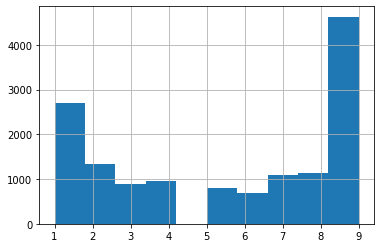

In [40]:
res['size'].hist()

In [41]:
# страны origin, по которым есть не менее 9 наблюдений, т.е данные за 9 лет

res[res['size'] > 8]['iso3_o'].unique()

array(['ALB', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BGR', 'BHR',
       'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CAN', 'CHE',
       'CHL', 'CHN', 'CIV', 'CMR', 'COL', 'CYP', 'CZE', 'DEU', 'DNK',
       'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN', 'FJI',
       'FRA', 'GBR', 'GEO', 'GRC', 'GRL', 'GTM', 'GUY', 'HKG', 'HRV',
       'HUN', 'IND', 'IRL', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN',
       'KAZ', 'KHM', 'KOR', 'LKA', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG',
       'MEX', 'MKD', 'MLT', 'MUS', 'MWI', 'MYS', 'NIC', 'NLD', 'NOR',
       'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'RUS', 'SAU', 'SEN', 'SGP', 'SLV', 'SVK', 'SVN', 'SWE', 'THA',
       'TUN', 'TUR', 'TZA', 'UGA', 'UKR', 'URY', 'USA', 'VNM', 'ZAF',
       'ZMB', 'ZWE'], dtype=object)

In [42]:
# страны destination, по которым есть не менее 9 наблюдений, т.е данные за 9 лет

res[res['size'] > 8]['iso3_d'].unique()

array(['AUT', 'ITA', 'ALB', 'ARE', 'AUS', 'AZE', 'BEL', 'BHR', 'BOL',
       'BRA', 'BRB', 'CAN', 'CHE', 'CHL', 'CHN', 'COL', 'CRI', 'DEU',
       'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'FIN', 'FRA', 'GBR',
       'GEO', 'GTM', 'HKG', 'HUN', 'IDN', 'IND', 'ISR', 'JOR', 'JPN',
       'KOR', 'LBN', 'LKA', 'LVA', 'MAR', 'MEX', 'MRT', 'MUS', 'MYS',
       'NGA', 'NIC', 'NLD', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL',
       'POL', 'PRT', 'PRY', 'RUS', 'SAU', 'SEN', 'SGP', 'SLV', 'THA',
       'TTO', 'TUN', 'TUR', 'URY', 'USA', 'VNM', 'YEM', 'ZAF', 'ZMB',
       'BLR', 'KAZ', 'MDA', 'UKR', 'ARG', 'ARM', 'BGR', 'BIH', 'BRN',
       'CIV', 'CYP', 'CZE', 'EST', 'FJI', 'GRC', 'HRV', 'IRL', 'ISL',
       'KHM', 'KIR', 'MDG', 'MDV', 'MKD', 'MLT', 'NOR', 'SLB', 'SVK',
       'SVN', 'SWE', 'SWZ', 'TZA', 'WSM', 'ZWE', 'BLZ', 'ETH', 'JAM',
       'KGZ', 'LUX', 'TGO', 'UGA', 'BDI', 'BEN', 'BFA', 'BHS', 'BWA',
       'CAF', 'CMR', 'COG', 'COM', 'CPV', 'GHA', 'GMB', 'GUY', 'MOZ',
       'MWI', 'NAM',

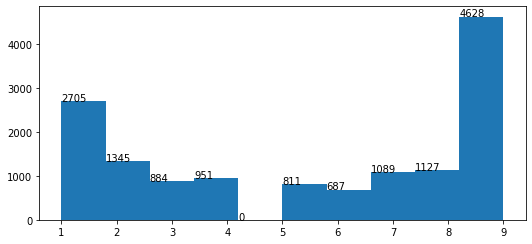

In [43]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = res['size']
counts, _, patches = plt.hist(data, align="mid")

for count, patch in zip(counts,patches):
    plt.annotate(str(int(count)), xy=(patch.get_x(), patch.get_height()))
plt.show()



In [44]:
final_ms_hhi_not_null

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows,Trade Value (US$),Market_Share,HHI_value,coeff_with_MS_HHI
7,2007,ALB,AUT,0.00,812.93,0.00,0.00,10701011.97,386439118.85,0.00,...,1.00,1.00,5.00,8,40,38.74,4404946520.00,0.00,0.34,-0.00
8,2007,ALB,BOL,0.00,11056.11,0.00,0.00,10701011.97,13120183.30,0.00,...,0.00,0.00,6.00,8,68,6.24,70611964.00,0.00,0.34,-0.00
9,2007,ALB,CRI,0.00,10418.61,0.00,0.00,10701011.97,26321999.87,0.00,...,0.00,0.00,6.00,8,188,22.07,437837440.00,0.00,0.34,-0.00
10,2007,ALB,DOM,0.00,8638.15,0.00,0.00,10701011.97,44078280.70,0.00,...,0.00,0.00,6.00,8,214,7.57,276221426.00,0.00,0.34,-0.00
11,2007,ALB,DEU,0.00,1493.10,0.00,0.00,10701011.97,3435506696.19,0.00,...,1.00,1.00,5.00,8,276,1.00,38729776000.00,0.00,0.34,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100418,2015,ZMB,NLD,0.00,7877.14,0.00,0.25,21154394.11,750318059.52,1.00,...,0.00,0.00,6.00,894,528,1.12,14432215955.00,0.00,0.16,-0.00
100419,2015,ZMB,NGA,0.00,3664.24,1.00,0.08,21154394.11,481066156.03,1.00,...,0.00,0.00,6.00,894,566,2.92,428289491.00,0.00,0.16,-0.00
100421,2015,ZMB,VCT,0.00,10353.20,1.00,0.18,21154394.11,737683.58,1.00,...,0.00,0.00,6.00,894,670,0.14,4311108.00,0.00,0.16,-0.00
100422,2015,ZMB,ZAF,0.00,2278.58,1.00,0.15,21154394.11,317406609.41,1.00,...,1.00,1.00,4.00,894,710,49.00,2172760372.00,0.00,0.16,-0.00


In [45]:
final_ms_hhi_not_null.groupby(['iso3_o', 'iso3_d'], as_index=False)['trade_flows'].sum().sort_values(by='trade_flows', ascending=False)

,iso3_o,iso3_d,trade_flows
6722,IRL,USA,89763354.16
3580,DEU,BEL,88235706.87
3729,DEU,USA,82388017.87
13554,USA,DEU,68162359.04
6583,IRL,BEL,68055134.52
...,...,...,...
7013,ISR,MDV,0.00
2864,CIV,ARE,0.00
12848,TON,GBR,0.00
5748,GUY,NAM,0.00


In [47]:
res_filtered = res[res['size']>6]

In [49]:
res_filtered['grouped_iso'] = res_filtered['iso3_o'] + res_filtered['iso3_d']

/tmp/ipykernel_579141/3177991317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_filtered['grouped_iso'] = res_filtered['iso3_o'] + res_filtered['iso3_d']


In [59]:
iso_to_use = list(res_filtered['grouped_iso'])

In [52]:
final_ms_hhi_not_null['final_iso'] = final_ms_hhi_not_null['iso3_o'] + final_ms_hhi_not_null['iso3_d']

In [60]:
final_ms_hhi_not_null_iso_filtered = final_ms_hhi_not_null[final_ms_hhi_not_null['final_iso'].isin(iso_to_use)]

In [63]:
final_ms_hhi_not_null_iso_filtered[final_ms_hhi_not_null_iso_filtered['final_iso'] == 'ALBAUT']

,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,gatt_o,...,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,trade_flows,Trade Value (US$),Market_Share,HHI_value,coeff_with_MS_HHI,final_iso
7,2007,ALB,AUT,0.00,812.93,0.00,0.00,10701011.97,386439118.85,0.00,...,1.00,5.00,8,40,38.74,4404946520.00,0.00,0.34,-0.00,ALBAUT
8359,2008,ALB,AUT,0.00,812.93,0.00,0.00,12881353.73,427627380.74,0.00,...,1.00,5.00,8,40,2.60,5194177786.00,0.00,0.26,-0.00,ALBAUT
18308,2009,ALB,AUT,0.00,812.93,0.00,0.00,12044208.13,397570342.91,0.00,...,3.00,5.00,8,40,8.61,5217269539.00,0.00,0.51,-0.00,ALBAUT
29292,2010,ALB,AUT,0.00,812.93,0.00,0.00,11926957.06,389656084.48,0.00,...,3.00,5.00,8,40,4.21,5127164145.00,0.00,0.25,-0.00,ALBAUT
40526,2011,ALB,AUT,0.00,812.93,0.00,0.00,12890866.69,429099515.90,0.00,...,3.00,5.00,8,40,0.09,5659407231.00,0.00,0.24,-0.00,ALBAUT
51969,2012,ALB,AUT,0.00,812.93,0.00,0.00,12344529.92,407575166.98,0.00,...,3.00,5.00,8,40,11.95,5191128669.00,0.00,0.24,-0.00,ALBAUT
63708,2013,ALB,AUT,0.00,812.93,0.00,0.00,12923240.45,428321898.50,0.00,...,3.00,5.00,8,40,7.40,5526701456.00,0.00,0.22,-0.00,ALBAUT
75699,2014,ALB,AUT,0.00,812.93,0.00,0.00,13219857.41,438376169.47,0.00,...,3.00,5.00,8,40,18.00,6010437695.00,0.00,0.23,-0.00,ALBAUT
87981,2015,ALB,AUT,0.00,812.93,0.00,0.00,11390365.70,376967397.38,0.00,...,3.00,5.00,8,40,0.79,5277713476.00,0.00,0.23,-0.00,ALBAUT


In [64]:
data11 = pd.read_csv('data11.csv')

In [65]:
data11.head()

,X,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,destTotImp,HHI_value,tr_flows,MS,olig_cor
0,7,2007,ALB,AUT,0,812.93,0,0.00,10701011.97,386439118.85,...,1,1,5,8,40,4404946520,0.34,38736.00,0.00,-0.00
1,8,2007,ALB,BOL,0,11056.11,0,0.00,10701011.97,13120183.30,...,0,0,6,8,68,70611964,0.34,6241.00,0.00,-0.00
2,9,2007,ALB,CRI,0,10418.61,0,0.00,10701011.97,26321999.87,...,0,0,6,8,188,437837440,0.34,22073.00,0.00,-0.00
3,10,2007,ALB,DOM,0,8638.15,0,0.00,10701011.97,44078280.70,...,0,0,6,8,214,276221426,0.34,7565.00,0.00,-0.00
4,11,2007,ALB,DEU,0,1493.10,0,0.00,10701011.97,3435506696.19,...,1,1,5,8,276,38729776000,0.34,1000.00,0.00,-0.00


In [66]:
data11['final_iso'] = data11['iso3_o'] + data11['iso3_d']

In [67]:
data11.head()

,X,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,...,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,destTotImp,HHI_value,tr_flows,MS,olig_cor,final_iso
0,7,2007,ALB,AUT,0,812.93,0,0.00,10701011.97,386439118.85,...,1,5,8,40,4404946520,0.34,38736.00,0.00,-0.00,ALBAUT
1,8,2007,ALB,BOL,0,11056.11,0,0.00,10701011.97,13120183.30,...,0,6,8,68,70611964,0.34,6241.00,0.00,-0.00,ALBBOL
2,9,2007,ALB,CRI,0,10418.61,0,0.00,10701011.97,26321999.87,...,0,6,8,188,437837440,0.34,22073.00,0.00,-0.00,ALBCRI
3,10,2007,ALB,DOM,0,8638.15,0,0.00,10701011.97,44078280.70,...,0,6,8,214,276221426,0.34,7565.00,0.00,-0.00,ALBDOM
4,11,2007,ALB,DEU,0,1493.10,0,0.00,10701011.97,3435506696.19,...,1,5,8,276,38729776000,0.34,1000.00,0.00,-0.00,ALBDEU


In [68]:
data11_filtered = data11[data11['final_iso'].isin(iso_to_use)]

In [69]:
data11_filtered.head()

,X,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,...,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,destTotImp,HHI_value,tr_flows,MS,olig_cor,final_iso
0,7,2007,ALB,AUT,0,812.93,0,0.00,10701011.97,386439118.85,...,1,5,8,40,4404946520,0.34,38736.00,0.00,-0.00,ALBAUT
4,11,2007,ALB,DEU,0,1493.10,0,0.00,10701011.97,3435506696.19,...,1,5,8,276,38729776000,0.34,1000.00,0.00,-0.00,ALBDEU
5,12,2007,ALB,GRC,1,500.12,0,0.00,10701011.97,318668275.71,...,1,5,8,300,4411954035,0.34,11904.00,0.00,-0.00,ALBGRC
7,14,2007,ALB,ITA,0,611.76,0,0.00,10701011.97,2203972534.27,...,1,5,8,381,15399984966,0.34,7921.00,0.00,-0.00,ALBITA
11,19,2007,DZA,CAN,0,6747.01,1,0.01,134977871.87,1457872830.46,...,0,6,12,124,10123052238,0.14,1830.00,0.00,-0.00,DZACAN


In [70]:
data11_filtered[data11_filtered['final_iso'] == 'ALBAUT']

,X,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,...,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,destTotImp,HHI_value,tr_flows,MS,olig_cor,final_iso
0,7,2007,ALB,AUT,0,812.93,0,0.00,10701011.97,386439118.85,...,1,5,8,40,4404946520,0.34,38736.00,0.00,-0.00,ALBAUT
6923,8359,2008,ALB,AUT,0,812.93,0,0.00,12881353.73,427627380.74,...,1,5,8,40,5194177786,0.26,2597.00,0.00,-0.00,ALBAUT
14837,18308,2009,ALB,AUT,0,812.93,0,0.00,12044208.13,397570342.91,...,3,5,8,40,5217269539,0.51,8610.00,0.00,-0.00,ALBAUT
23433,29292,2010,ALB,AUT,0,812.93,0,0.00,11926957.06,389656084.48,...,3,5,8,40,5127164145,0.25,4208.00,0.00,-0.00,ALBAUT
32602,40526,2011,ALB,AUT,0,812.93,0,0.00,12890866.69,429099515.90,...,3,5,8,40,5659407231,0.24,86.00,0.00,-0.00,ALBAUT
41742,51969,2012,ALB,AUT,0,812.93,0,0.00,12344529.92,407575166.98,...,3,5,8,40,5191128669,0.24,11945.00,0.00,-0.00,ALBAUT
50914,63708,2013,ALB,AUT,0,812.93,0,0.00,12923240.45,428321898.50,...,3,5,8,40,5526701456,0.22,7398.00,0.00,-0.00,ALBAUT
60241,75699,2014,ALB,AUT,0,812.93,0,0.00,13219857.41,438376169.47,...,3,5,8,40,6010437695,0.23,18005.00,0.00,-0.00,ALBAUT
69382,87981,2015,ALB,AUT,0,812.93,0,0.00,11390365.70,376967397.38,...,3,5,8,40,5277713476,0.23,795.00,0.00,-0.00,ALBAUT


In [72]:
data11_filtered.drop(['final_iso'], axis =1, inplace = True)

/home/max/Python/Angela/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
data11_filtered.head()

,X,year,iso3_o,iso3_d,contig,dist,comlang_off,comrelig,gdp_o,gdp_d,...,rta,rta_coverage,rta_type,iso3num_o_y,iso3num_d_y,destTotImp,HHI_value,tr_flows,MS,olig_cor
0,7,2007,ALB,AUT,0,812.93,0,0.00,10701011.97,386439118.85,...,1,1,5,8,40,4404946520,0.34,38736.00,0.00,-0.00
4,11,2007,ALB,DEU,0,1493.10,0,0.00,10701011.97,3435506696.19,...,1,1,5,8,276,38729776000,0.34,1000.00,0.00,-0.00
5,12,2007,ALB,GRC,1,500.12,0,0.00,10701011.97,318668275.71,...,1,1,5,8,300,4411954035,0.34,11904.00,0.00,-0.00
7,14,2007,ALB,ITA,0,611.76,0,0.00,10701011.97,2203972534.27,...,1,1,5,8,381,15399984966,0.34,7921.00,0.00,-0.00
11,19,2007,DZA,CAN,0,6747.01,1,0.01,134977871.87,1457872830.46,...,0,0,6,12,124,10123052238,0.14,1830.00,0.00,-0.00


In [74]:
data11_filtered.to_csv('data11_filtered.csv')